## Airline Passenger Satisfaction - Tabular Dataset Classification

En este proyecto, se utilizará un conjunto de datos de vuelos comerciales que contiene información detallada sobre los pasajeros y su percepción respecto a diversos aspectos del servicio aéreo. El objetivo principal es analizar, visualizar y modelar la satisfacción de los pasajeros a partir de diferentes variables.

Fuente: _**[Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)**_

Utilizaremos 2 archivos:
- **Train**: `airline_passenger_satisfaction_train.csv`
- **Test**: `airline_passenger_satisfaction_test.csv`

Como en este proyecto ya tenemos la separación de **Train** y **Test** vamos primero a trabajar con el conjunto de **Train** y usaremos el conjunto de **Test** para calcular el rendimiento del modelo.

Información del **DataFrame**:

| Columna                              | Descripción                                                          |
|--------------------------------------|----------------------------------------------------------------------|
| **id**                               | Passenger ID number.                                                 |
| **Gender**                           | Gender of the passengers (Female, Male)                              |
| **Customer Type**                    | The customer type (Loyal customer, disloyal customer)                |
| **Age**                              | The actual age of the passengers                                     |
| **Type of Travel**                   | Purpose of the flight (Personal Travel, Business Travel)             |
| **Class**                            | Travel class in the plane (Business, Eco, Eco Plus)                  |
| **Flight distance**                  | The flight distance of this journey                                  |
| **Inflight wifi service**            | Satisfaction level of inflight wifi service (0: Not Applicable; 1-5) |
| **Departure/Arrival time convenient**| Satisfaction level of Departure/Arrival time convenience             |
| **Ease of Online booking**           | Satisfaction level of online booking                                 |
| **Gate location**                    | Satisfaction level of Gate location                                  |
| **Food and drink**                   | Satisfaction level of Food and drink                                 |
| **Online boarding**                  | Satisfaction level of online boarding                                |
| **Seat comfort**                     | Satisfaction level of Seat comfort                                   |
| **Inflight entertainment**           | Satisfaction level of Inflight entertainment                         |
| **On-board service**                 | Satisfaction level of On-board service                               |
| **Leg room service**                 | Satisfaction level of Leg room service                               |
| **Baggage handling**                 | Satisfaction level of Baggage handling                               |
| **Check-in service**                 | Satisfaction level of Check-in service                               |
| **Inflight service**                 | Satisfaction level of Inflight service                               |
| **Cleanliness**                      | Satisfaction level of Cleanliness                                    |
| **Departure Delay in Minutes**       | Minutes delayed at departure                                         |
| **Arrival Delay in Minutes**         | Minutes delayed at arrival                                           |
| **Satisfaction**                     | Airline satisfaction level (Satisfaction, Neutral or Dissatisfaction)|

#### 01. Exploratory Data Analysis

Usando el conjunto de **Train**, define una función que tome una columna del **DataFrame** y que represente con una gráfica su relación con la columna **target** (_Satisfaction_) usando _**sns.countplot()**_ o _**sns.boxplot()**_ dependiendo del tipo de dato de la columna.

#### 02. Procesamiento de Datos

Usando el conjunto de **Train**, usa transformaciones para representar cada columna de forma numérica:
- Tratamiento de **NaN's**.
- Tratamiento de outliers.
- Usa _**OneHotEncoder**_ para las columnas categóricas.
- Usa _**LabelEncoder**_ para la columna _**target**_.
- Muestra el mapa de correlaciones con el **DataFrame** ya transformado.

Usando los conjuntos de **Train** y **Test**:
- Aplica las mismas transformaciones al conjunto de **Test**. Usa los encoders ya entrenados y la misma estratégia para los NaN's. No elimines outliers de este conjunto.
- Define las variables: _**X_train**_, _**X_test**_, _**y_train**_, _**y_test**_
- Escala los datos del conjunto de **Train** con _**MinMaxScaler**_.
- Escala los datos con el escalador ya entrenado.

#### 03. Modelo de Clasificación (Machine Learning) y Métricas

- Entrena distintos modelos de clasificación usando _**X_train**_ e _**y_train**_ y calcula las métricas para cada modelo usando _**X_test**_ e _**y_test**_. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el método de _**.predict_proba()**_ con el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 04. Modelo de Clasificación (Deep Learning) y Métricas

- Define una Red Neuronal para clasificación binaria usando _**X_train**_ e _**y_train**_ y calcula las métricas de la red neuronal usando _**X_test**_ e _**y_test**_, la función de activación de la capa de salida debe de ser **Sigmoid**. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 05. Resultados

- ¿Cuál es la mejor métrica para este tipo de problema?
- ¿Que modelo de Machine Learning tiene mejor rendimiento?
- ¿Cuál es el mejor threshold para este modelo?
- ¿Es mejor el modelo de Deep Learning que los modelos de Machine Learning?
- ¿Cuál threshold es el mejor para el modelo de Deep Learning?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

df_train = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_train.csv")
df_test = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_test.csv")

print(f"Train: {df_train.shape}, Test: {df_test.shape}")

Train: (103904, 24), Test: (25976, 24)


In [2]:
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [4]:
df_train = df_train.dropna().reset_index(drop = True)

df_train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
# Cambiamos los tipos de datos

columnas_float = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

df_train[columnas_float] = df_train[columnas_float].astype("float64")

# df_train[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]] = df_train[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]].apply(lambda x : np.log1p(x))

In [6]:
df_train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,4,3,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,2,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [7]:
def visualizar_columna(columna, df = df_train, target = "satisfaction"):

    if df[columna].dtype in ("int64", "object"):
        sns.countplot(x = df[columna], hue = df[target])
        plt.show()

    else:
        sns.boxplot(x = df[target], y = df[columna], hue = df[target])
        plt.show()

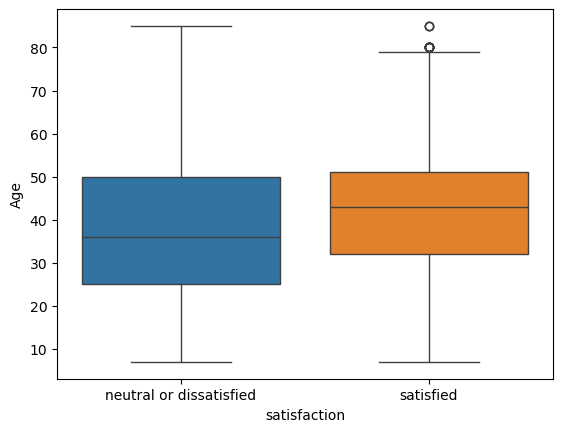

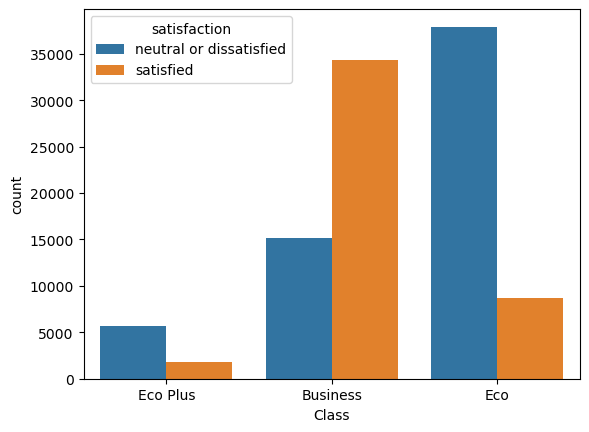

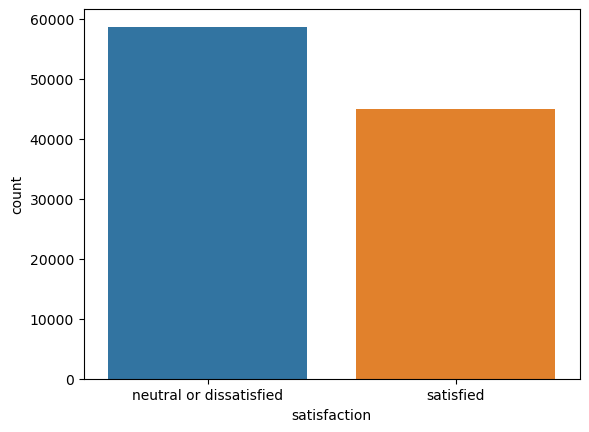

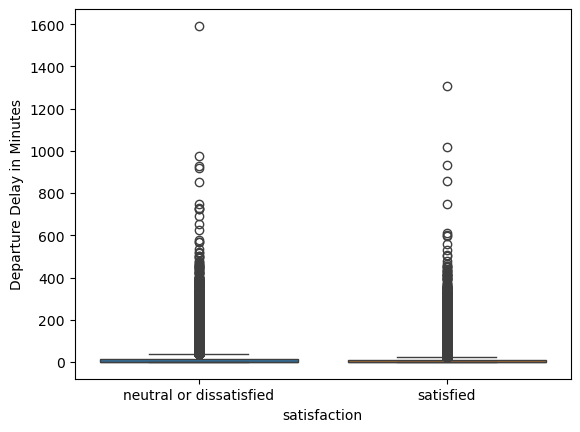

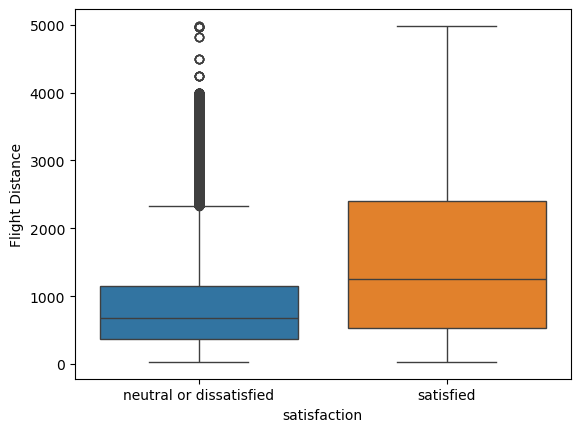

In [8]:
visualizar_columna("Age")
visualizar_columna("Class")
visualizar_columna("satisfaction")
visualizar_columna("Departure Delay in Minutes")
visualizar_columna("Flight Distance")

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

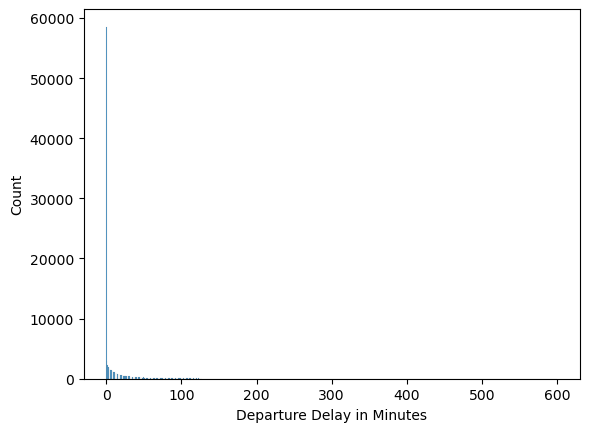

In [9]:
sns.histplot(df_train[df_train["Departure Delay in Minutes"].between(0, 600)]["Departure Delay in Minutes"])

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

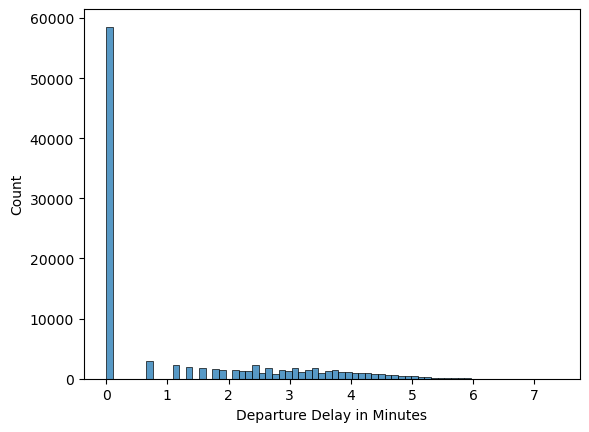

In [10]:
sns.histplot(df_train["Departure Delay in Minutes"].apply(lambda x : np.log1p(x)))

<Axes: xlabel='Flight Distance', ylabel='Count'>

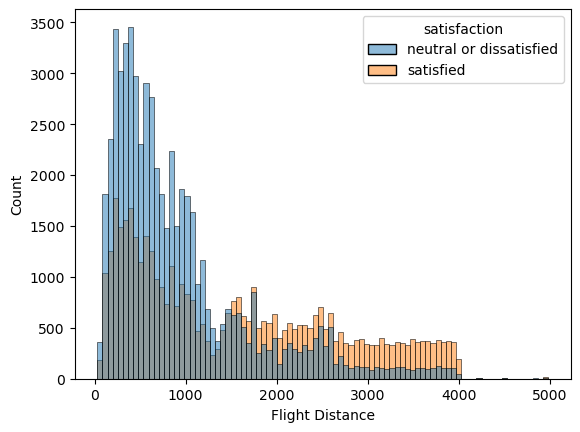

In [11]:
sns.histplot(x = df_train["Flight Distance"], hue = df_train["satisfaction"])

In [12]:
ohe_gender = OneHotEncoder()
ohe_customer_type = OneHotEncoder()
ohe_type_travel = OneHotEncoder()
ohe_class = OneHotEncoder()


ohe_gender.fit(df_train[["Gender"]])
ohe_customer_type.fit(df_train[["Customer Type"]])
ohe_type_travel.fit(df_train[["Type of Travel"]])
ohe_class.fit(df_train[["Class"]])


df_gender = pd.DataFrame(data = ohe_gender.transform(df_train[["Gender"]]).toarray(),
                         columns = ohe_gender.get_feature_names_out())

df_customer_type = pd.DataFrame(data = ohe_customer_type.transform(df_train[["Customer Type"]]).toarray(),
                                columns = ohe_customer_type.get_feature_names_out())

df_type_travel = pd.DataFrame(data = ohe_type_travel.transform(df_train[["Type of Travel"]]).toarray(),
                              columns = ohe_type_travel.get_feature_names_out())

df_class = pd.DataFrame(data = ohe_class.transform(df_train[["Class"]]).toarray(),
                         columns = ohe_class.get_feature_names_out())

df_train = pd.concat([df_train, df_gender, df_customer_type, df_type_travel, df_class], axis = 1)

df_train = df_train.drop(["id", "Gender", "Customer Type", "Type of Travel", "Class"], axis = 1)

df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13.0,460.0,3,4,3,1,5,3,5,5,...,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25.0,235.0,3,2,3,3,1,3,1,1,...,neutral or dissatisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26.0,1142.0,2,2,2,2,5,5,5,5,...,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25.0,562.0,2,5,5,5,2,2,2,2,...,neutral or dissatisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61.0,214.0,3,3,3,3,4,5,5,3,...,satisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
map_satistaction = {"satisfied"               : 1,
                    "neutral or dissatisfied" : 0}

df_train["satisfaction"] = df_train["satisfaction"].map(map_satistaction)

df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13.0,460.0,3,4,3,1,5,3,5,5,...,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25.0,235.0,3,2,3,3,1,3,1,1,...,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26.0,1142.0,2,2,2,2,5,5,5,5,...,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25.0,562.0,2,5,5,5,2,2,2,2,...,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61.0,214.0,3,3,3,3,4,5,5,3,...,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


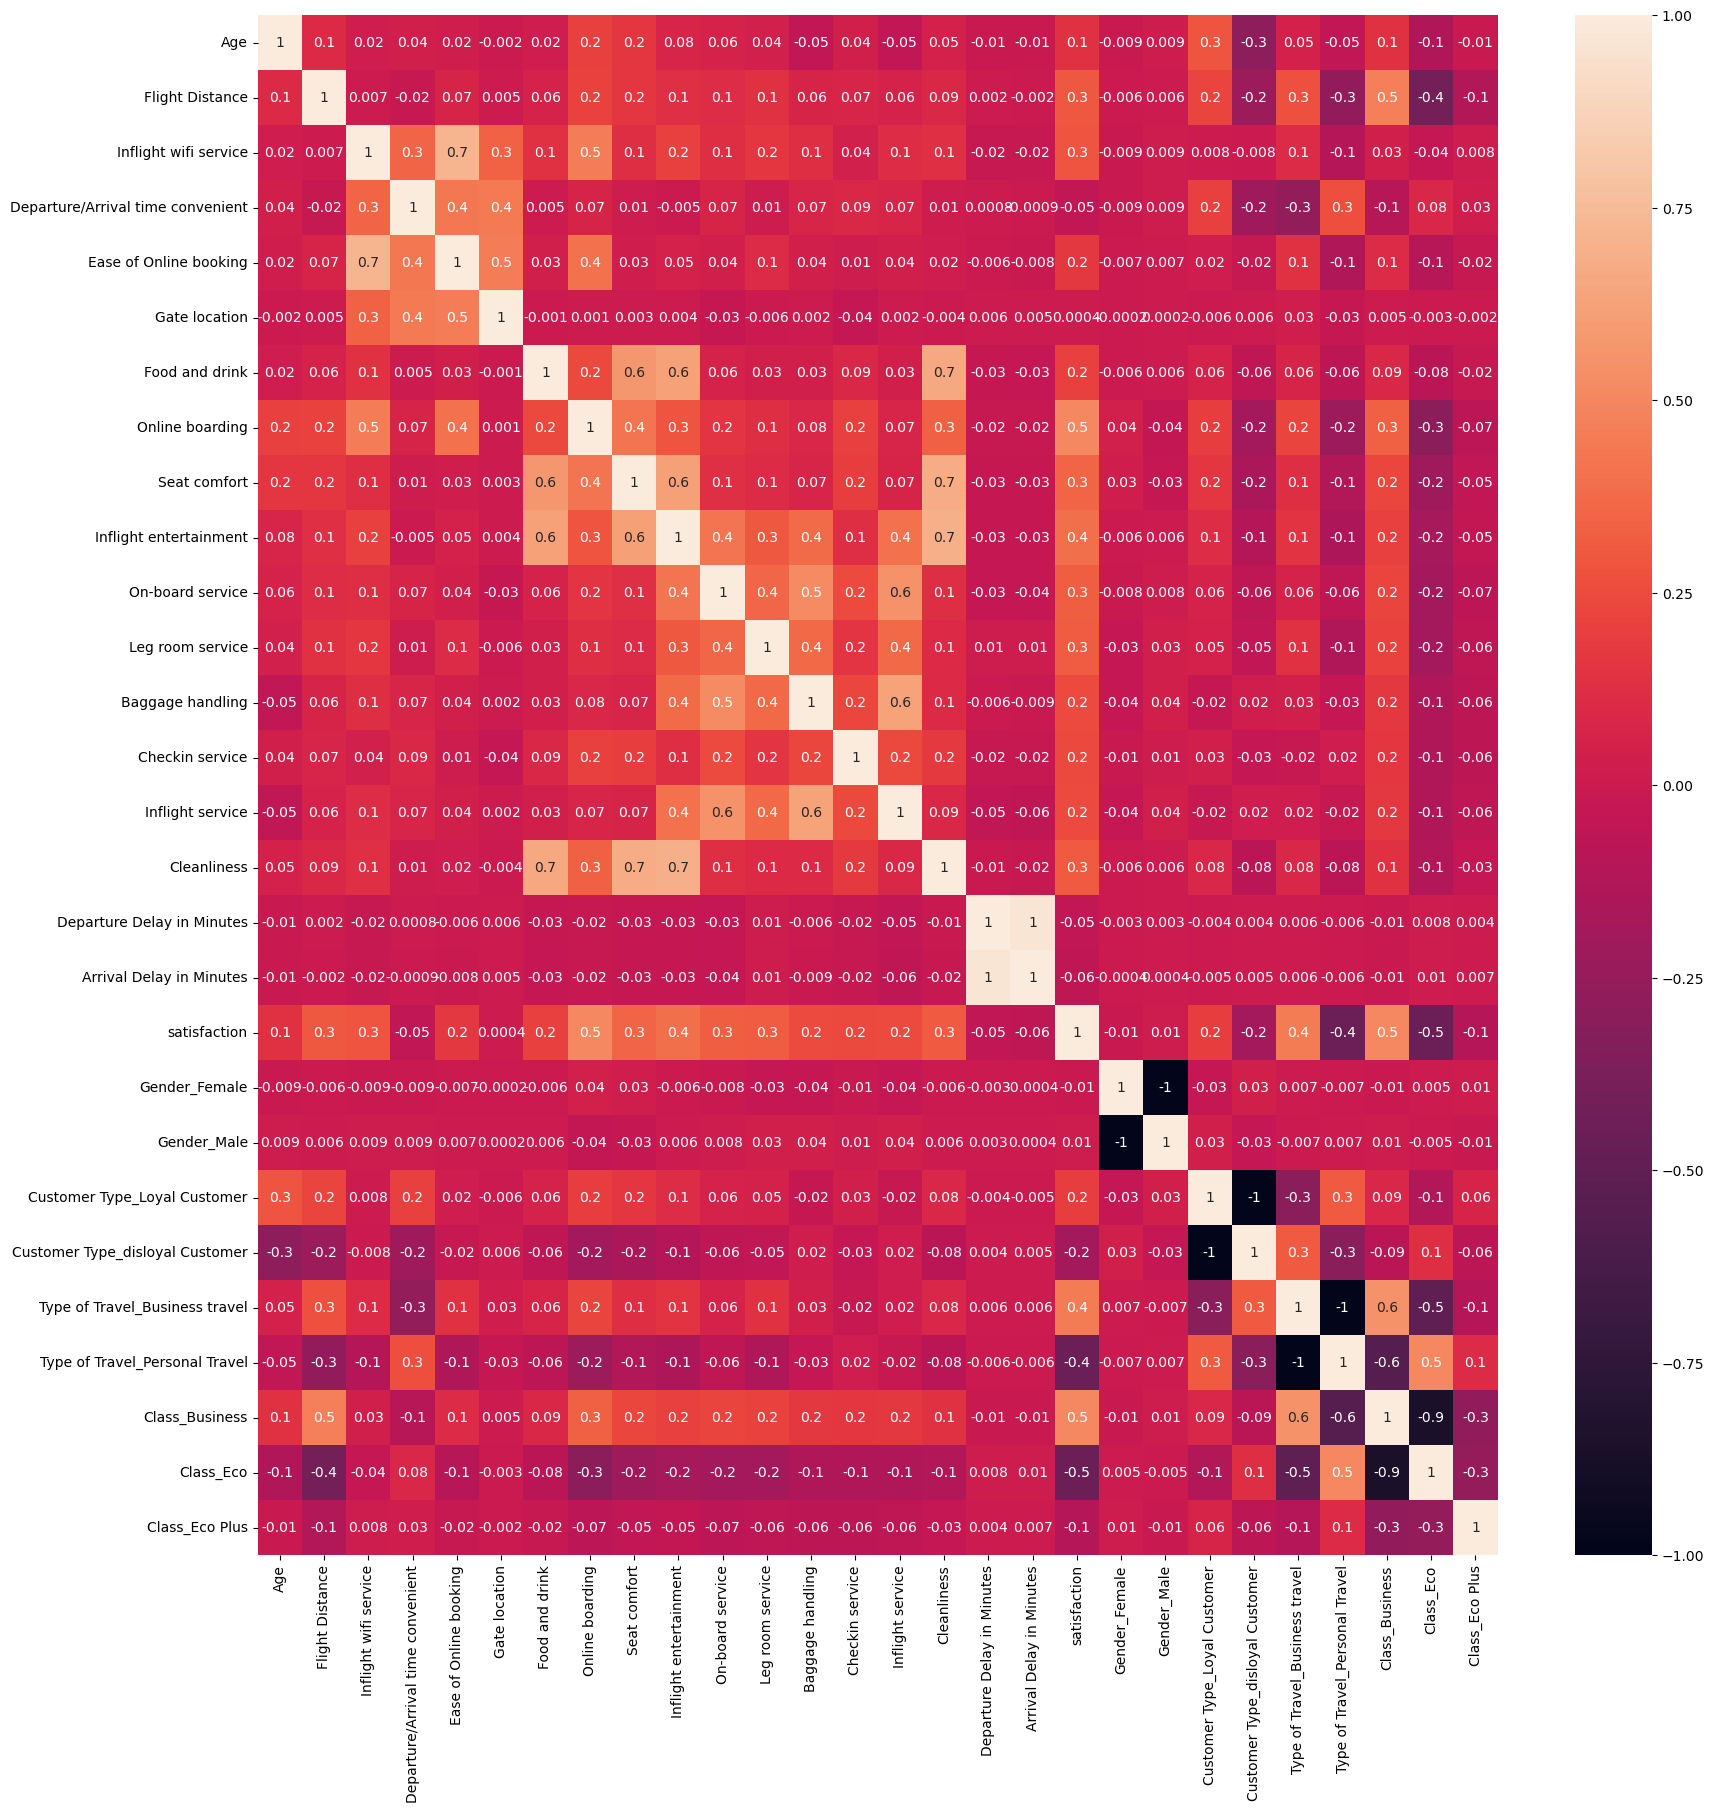

In [14]:
plt.figure(figsize = (20, 20))

sns.heatmap(data = df_train.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".1g")
plt.show()

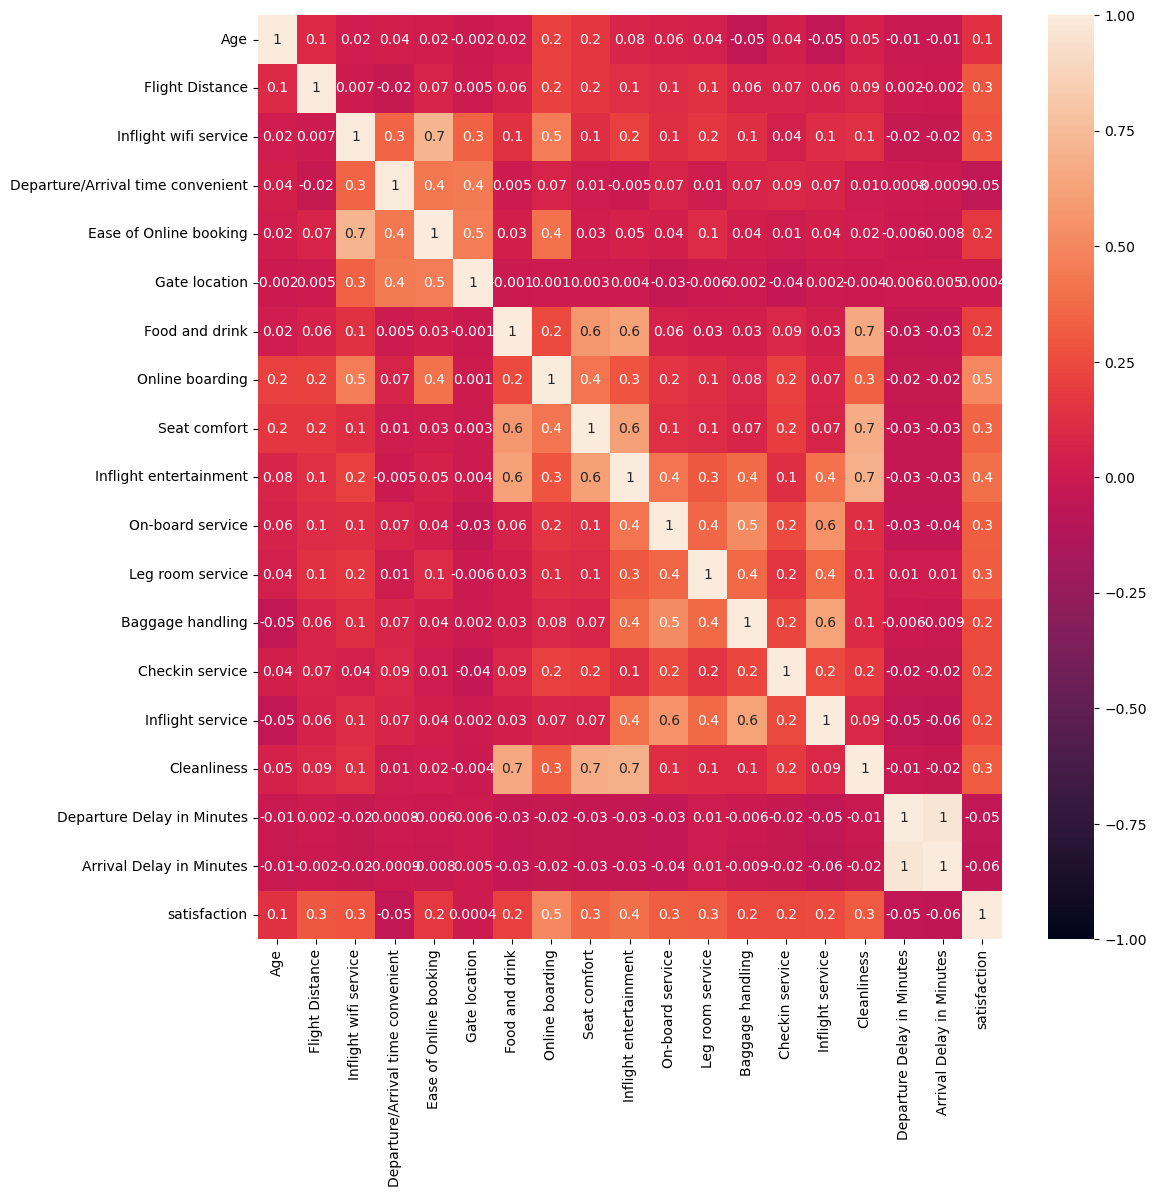

In [15]:
plt.figure(figsize = (12, 12))

sns.heatmap(data = df_train.iloc[:, :19].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".1g")
plt.show()

In [16]:
# Transformar df_test

df_test = df_test.dropna().reset_index(drop = True)

df_test[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]] = df_test[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]].apply(lambda x : np.log1p(x))


df_gender = pd.DataFrame(data = ohe_gender.transform(df_test[["Gender"]]).toarray(),
                         columns = ohe_gender.get_feature_names_out())

df_customer_type = pd.DataFrame(data = ohe_customer_type.transform(df_test[["Customer Type"]]).toarray(),
                                columns = ohe_customer_type.get_feature_names_out())

df_type_travel = pd.DataFrame(data = ohe_type_travel.transform(df_test[["Type of Travel"]]).toarray(),
                              columns = ohe_type_travel.get_feature_names_out())

df_class = pd.DataFrame(data = ohe_class.transform(df_test[["Class"]]).toarray(),
                         columns = ohe_class.get_feature_names_out())

df_test = pd.concat([df_test, df_gender, df_customer_type, df_type_travel, df_class], axis = 1)

df_test = df_test.drop(["id", "Gender", "Customer Type", "Type of Travel", "Class"], axis = 1)


df_test["satisfaction"] = df_test["satisfaction"].map(map_satistaction)

df_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,5.081404,5,4,3,4,3,4,3,5,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,36,7.959975,1,1,3,1,5,4,5,4,...,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20,5.262690,2,0,2,4,2,2,2,2,...,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,8.125039,0,0,0,2,3,4,4,1,...,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,7.075809,2,3,4,3,4,1,2,2,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
df_train = df_train.drop_duplicates().reset_index(drop = True)
df_test = df_test.drop_duplicates().reset_index(drop = True)

In [18]:
X_train = df_train.drop("satisfaction", axis = 1)
X_test = df_test.drop("satisfaction", axis = 1)

y_train = df_train["satisfaction"]
y_test = df_test["satisfaction"]

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")

X_train: (103594, 27), y_train:(103594,)
X_test: (25893, 27), y_test:(25893,)


In [19]:
x_scaler = MinMaxScaler()

x_scaler.fit(X_train)

X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

In [20]:
%%time

metricas = list()

modelos = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]

for modelo in modelos:
    modelo.fit(X_train, y_train)

    yhat = modelo.predict(X_test)
    yhat_proba = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, yhat)
    rec = recall_score(y_test, yhat)
    pre = precision_score(y_test, yhat)
    f1_ = f1_score(y_test, yhat)
    roc = roc_auc_score(y_test, yhat_proba[:, 1])

    metricas.append([str(modelo), acc, rec, pre, f1_, roc])

df_metricas = pd.DataFrame(data = metricas,
                           columns = ["modelo", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_metricas

CPU times: total: 1min 10s
Wall time: 29.6 s


,modelo,accuracy,recall,precision,f1_score,roc_auc
0,LogisticRegression(),0.868999,0.839419,0.858918,0.849057,0.924629
1,KNeighborsClassifier(),0.928513,0.884382,0.949282,0.915684,0.970091
2,DecisionTreeClassifier(),0.914919,0.925561,0.885736,0.905211,0.916078
3,RandomForestClassifier(),0.959912,0.946062,0.961975,0.953953,0.992834
4,"XGBClassifier(base_score=None, booster=None, c...",0.959101,0.946326,0.959925,0.953077,0.993439


In [21]:
df_metricas.sort_values("accuracy", ascending = False)

,modelo,accuracy,recall,precision,f1_score,roc_auc
3,RandomForestClassifier(),0.959912,0.946062,0.961975,0.953953,0.992834
4,"XGBClassifier(base_score=None, booster=None, c...",0.959101,0.946326,0.959925,0.953077,0.993439
1,KNeighborsClassifier(),0.928513,0.884382,0.949282,0.915684,0.970091
2,DecisionTreeClassifier(),0.914919,0.925561,0.885736,0.905211,0.916078
0,LogisticRegression(),0.868999,0.839419,0.858918,0.849057,0.924629


In [22]:
data = list()

modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

yhat_proba = modelo.predict_proba(X_test)

for thresh in np.arange(0.00, 1.00, 0.001):
    
    yhat_thresh = (yhat_proba[:, 1] >= thresh).astype(int)

    acc = accuracy_score(y_test, yhat_thresh)
    rec = recall_score(y_test, yhat_thresh)
    pre = precision_score(y_test, yhat_thresh)
    f1_ = f1_score(y_test, yhat_thresh)
    roc = roc_auc_score(y_test, yhat_thresh)

    data.append([thresh, acc, rec, pre, f1_, roc])

df_thresh = pd.DataFrame(data = data,
                         columns = ["thresh", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_thresh

,thresh,accuracy,recall,precision,f1_score,roc_auc
0,0.000,0.438922,1.000000,0.438922,0.610070,0.500000
1,0.001,0.732360,0.999824,0.621234,0.766320,0.761476
2,0.002,0.767003,0.999736,0.653289,0.790208,0.792338
3,0.003,0.782451,0.999472,0.668727,0.801312,0.806076
4,0.004,0.792956,0.999384,0.679631,0.809061,0.815427
...,...,...,...,...,...,...
995,0.995,0.893871,0.758381,0.999768,0.862504,0.879122
996,0.996,0.887074,0.742895,0.999763,0.852398,0.871379
997,0.997,0.877612,0.721337,0.999756,0.838027,0.860600
998,0.998,0.863245,0.688605,0.999745,0.815506,0.844234


In [23]:
metrics = {
    "recall" : [],
    "specificity" : []
}

for thresh in np.arange(0.00, 1.00, 0.001):
    yhat_thresh = (yhat_proba[:, 1] >= thresh).astype(int)

    metrics["recall"].append(recall_score(y_test, yhat_thresh))
    metrics["specificity"].append(recall_score(np.logical_not(y_test), np.logical_not(yhat_thresh)))

recall = np.array(metrics["recall"])
inv_specificity = 1 - np.array(metrics["specificity"])



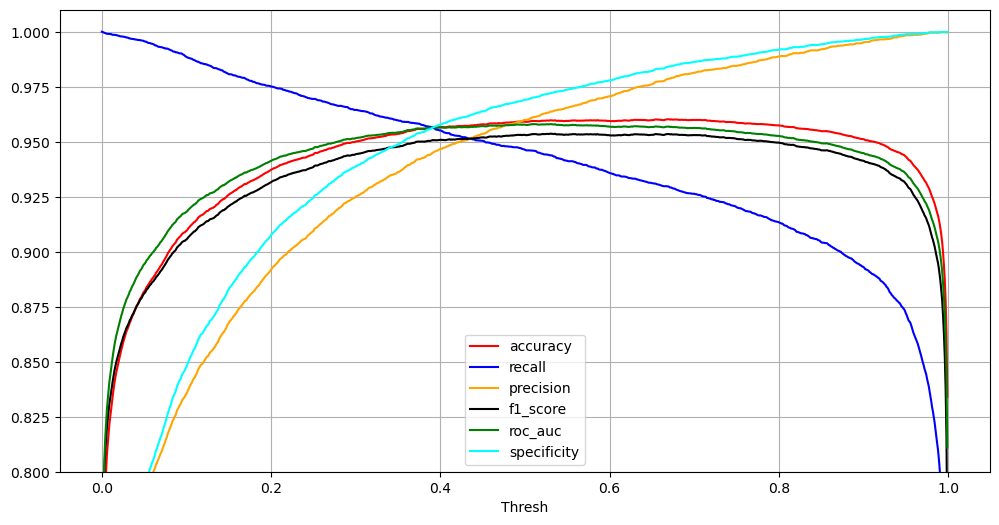

In [24]:
plt.figure(figsize = (12, 6))

plt.plot(df_thresh["thresh"], df_thresh["accuracy"], color = "red", label = "accuracy")
plt.plot(df_thresh["thresh"], df_thresh["recall"], color = "blue", label = "recall")
plt.plot(df_thresh["thresh"], df_thresh["precision"], color = "orange", label = "precision")
plt.plot(df_thresh["thresh"], df_thresh["f1_score"], color = "black", label = "f1_score")
plt.plot(df_thresh["thresh"], df_thresh["roc_auc"], color = "green", label = "roc_auc")
plt.plot(df_thresh["thresh"], metrics["specificity"], color = "cyan", label = "specificity")


plt.legend()
plt.ylim(0.8, 1.01)
plt.xlabel("Thresh")
plt.grid()
plt.show()

In [25]:
df_thresh["specificity"] = metrics["specificity"]

df_thresh["diff_spe_rec"] = df_thresh[["specificity", "recall"]].apply(lambda x : abs(x["specificity"] - x["recall"]), axis = 1)

df_thresh.sort_values("diff_spe_rec", ascending = True)

,thresh,accuracy,recall,precision,f1_score,roc_auc,specificity,diff_spe_rec
391,0.391,0.956513,0.956533,0.945058,0.950761,0.956516,0.956498,0.000035
392,0.392,0.956436,0.956181,0.945203,0.950660,0.956408,0.956635,0.000454
390,0.390,0.956359,0.956621,0.944652,0.950599,0.956387,0.956154,0.000468
389,0.389,0.956282,0.956621,0.944488,0.950516,0.956319,0.956016,0.000605
393,0.393,0.956475,0.956005,0.945440,0.950693,0.956424,0.956842,0.000837
...,...,...,...,...,...,...,...,...
999,0.999,0.834048,0.622085,0.999717,0.766936,0.810974,0.999862,0.377777
3,0.003,0.782451,0.999472,0.668727,0.801312,0.806076,0.612679,0.386793
2,0.002,0.767003,0.999736,0.653289,0.790208,0.792338,0.584939,0.414797
1,0.001,0.732360,0.999824,0.621234,0.766320,0.761476,0.523128,0.476696


In [26]:
yhat_mejor_thresh = (yhat_proba[:, 1] >= 0.391).astype(int)

confusion_matrix(y_test, yhat_mejor_thresh)

array([[13896,   632],
       [  494, 10871]])

In [27]:
yhat_mejor_thresh = (yhat_proba[:, 1] >= 0.8).astype(int)

confusion_matrix(y_test, yhat_mejor_thresh)

array([[14410,   118],
       [  984, 10381]])

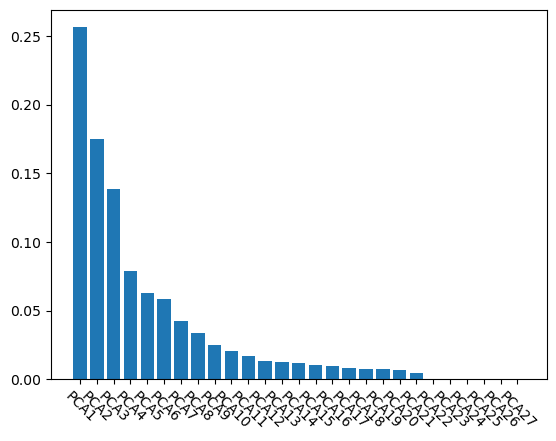

In [28]:
# Grafica de varianzas

from sklearn.decomposition import PCA

# Vamos a usar las 11 columnas
pca = PCA(n_components = 27)

X_train_pca = pca.fit_transform(X_train)

labels = [f"PCA{i + 1}" for i in range(X_train_pca.shape[1])]

plt.bar(x = labels, height = pca.explained_variance_ratio_)
plt.xticks(rotation = -45)

plt.show()

# Usando esta gráfica como referencia podemos decidir el número de columnas para usar en el PCA.

In [29]:
%%time

# Vamos a usar las 22 columnas
pca = PCA(n_components = 22)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

metricas = list()

modelos = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]

for modelo in modelos:
    modelo.fit(X_train_pca, y_train)

    yhat = modelo.predict(X_test_pca)
    yhat_proba = modelo.predict_proba(X_test_pca)

    acc = accuracy_score(y_test, yhat)
    rec = recall_score(y_test, yhat)
    pre = precision_score(y_test, yhat)
    f1_ = f1_score(y_test, yhat)
    roc = roc_auc_score(y_test, yhat_proba[:, 1])

    metricas.append([str(modelo), acc, rec, pre, f1_, roc])

df_metricas = pd.DataFrame(data = metricas,
                           columns = ["modelo", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_metricas

CPU times: total: 2min 58s
Wall time: 1min 43s


,modelo,accuracy,recall,precision,f1_score,roc_auc
0,LogisticRegression(),0.868999,0.839331,0.858982,0.849043,0.924633
1,KNeighborsClassifier(),0.928513,0.884382,0.949282,0.915684,0.970093
2,DecisionTreeClassifier(),0.902329,0.890541,0.887340,0.888938,0.901046
3,RandomForestClassifier(),0.940640,0.907347,0.955169,0.930644,0.985724
4,"XGBClassifier(base_score=None, booster=None, c...",0.945931,0.931544,0.944509,0.937982,0.988456


In [30]:
# Deep Learning

# Clase del modelo
model = Sequential()

# Capa de entrada
model.add(Input(shape = X_train.shape[1:]))

# Capas ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))

# Capa de salida
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

model.compile(loss = BinaryCrossentropy(),
              optimizer = Adam(),
              metrics = [BinaryAccuracy()])

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 5,
                    verbose = 1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 48,385 (189.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.9268 - loss: 0.1774 - val_binary_accuracy: 0.9292 - val_loss: 0.1494
Epoch 2/5
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.9478 - loss: 0.1245 - val_binary_accuracy: 0.9494 - val_loss: 0.1171
Epoch 3/5
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.9523 - loss: 0.1133 - val_binary_accuracy: 0.9534 - val_loss: 0.1119
Epoch 4/5
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.9548 - loss: 0.1073 - val_binary_accuracy: 0.9540 - val_loss: 0.1023
Epoch 5/5
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.9560 - loss: 0.1035 - val_binary_accuracy: 0.9565 - val_loss: 0.1033


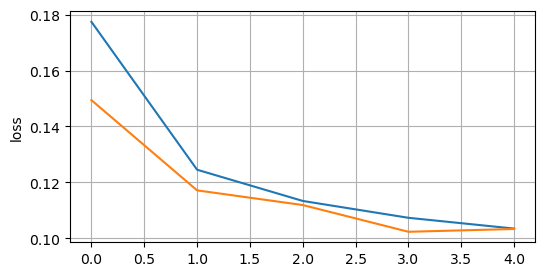

In [31]:
plt.figure(figsize=(6,3))
sns.lineplot(history.history, y="loss", x=history.epoch)
sns.lineplot(history.history, y="val_loss", x=history.epoch)
plt.grid()
plt.show()

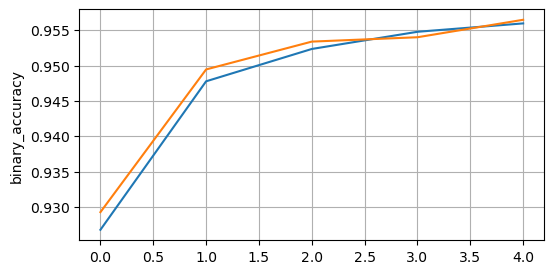

In [32]:
plt.figure(figsize=(6,3))
sns.lineplot(history.history, y="binary_accuracy", x=history.epoch)
sns.lineplot(history.history, y="val_binary_accuracy", x=history.epoch)
plt.grid()
plt.show()

In [33]:
yhat = model.predict(X_test)
yhat

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step  


array([[9.7959363e-01],
       [9.9999994e-01],
       [2.5971950e-04],
       ...,
       [2.9159287e-08],
       [9.9991363e-01],
       [3.6787043e-08]], dtype=float32)

In [34]:
data = list()

yhat_proba = model.predict(X_test)

for thresh in np.arange(0.00, 1.00, 0.001):
    
    yhat_thresh = (yhat_proba >= thresh).astype(int)

    acc = accuracy_score(y_test, yhat_thresh)
    rec = recall_score(y_test, yhat_thresh)
    pre = precision_score(y_test, yhat_thresh)
    f1_ = f1_score(y_test, yhat_thresh)
    roc = roc_auc_score(y_test, yhat_thresh)

    data.append([thresh, acc, rec, pre, f1_, roc])

df_thresh = pd.DataFrame(data = data,
                         columns = ["thresh", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_thresh

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step


,thresh,accuracy,recall,precision,f1_score,roc_auc
0,0.000,0.438922,1.000000,0.438922,0.610070,0.500000
1,0.001,0.748233,1.000000,0.635484,0.777121,0.775640
2,0.002,0.767350,1.000000,0.653574,0.790499,0.792676
3,0.003,0.780558,0.999824,0.666725,0.799986,0.804427
4,0.004,0.790638,0.999736,0.677116,0.807390,0.813401
...,...,...,...,...,...,...
995,0.995,0.875333,0.716410,0.999386,0.834563,0.858033
996,0.996,0.870506,0.705411,0.999377,0.827049,0.852534
997,0.997,0.862743,0.687637,0.999488,0.814741,0.843681
998,0.998,0.851273,0.661329,0.999734,0.796060,0.830595


In [35]:
df_thresh.sort_values("roc_auc", ascending = False)

,thresh,accuracy,recall,precision,f1_score,roc_auc
404,0.404,0.956668,0.943775,0.956910,0.950297,0.955264
400,0.400,0.956591,0.944215,0.956332,0.950235,0.955243
415,0.415,0.956784,0.942631,0.958229,0.950366,0.955243
403,0.403,0.956629,0.943863,0.956743,0.950259,0.955239
402,0.402,0.956591,0.943951,0.956576,0.950221,0.955215
...,...,...,...,...,...,...
999,0.999,0.828950,0.610471,0.999712,0.758044,0.805167
3,0.003,0.780558,0.999824,0.666725,0.799986,0.804427
2,0.002,0.767350,1.000000,0.653574,0.790499,0.792676
1,0.001,0.748233,1.000000,0.635484,0.777121,0.775640


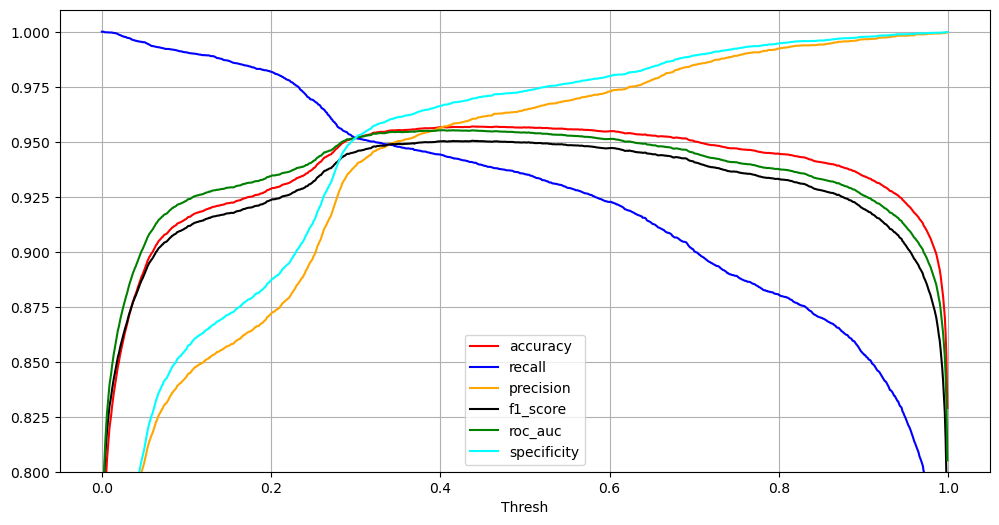

In [36]:
plt.figure(figsize = (12, 6))

metrics = {
    "recall" : [],
    "specificity" : []
}

for thresh in np.arange(0.00, 1.00, 0.001):
    yhat_thresh = (yhat_proba >= thresh).astype(int)

    metrics["recall"].append(recall_score(y_test, yhat_thresh))
    metrics["specificity"].append(recall_score(np.logical_not(y_test), np.logical_not(yhat_thresh)))

recall = np.array(metrics["recall"])
inv_specificity = 1 - np.array(metrics["specificity"])



plt.plot(df_thresh["thresh"], df_thresh["accuracy"], color = "red", label = "accuracy")
plt.plot(df_thresh["thresh"], df_thresh["recall"], color = "blue", label = "recall")
plt.plot(df_thresh["thresh"], df_thresh["precision"], color = "orange", label = "precision")
plt.plot(df_thresh["thresh"], df_thresh["f1_score"], color = "black", label = "f1_score")
plt.plot(df_thresh["thresh"], df_thresh["roc_auc"], color = "green", label = "roc_auc")
plt.plot(df_thresh["thresh"], metrics["specificity"], color = "cyan", label = "specificity")


plt.legend()
plt.ylim(0.8, 1.01)
plt.xlabel("Thresh")
plt.grid()
plt.show()

In [37]:
df_thresh["specificity"] = metrics["specificity"]

df_thresh["diff_spe_rec"] = df_thresh[["specificity", "recall"]].apply(lambda x : abs(x["specificity"] - x["recall"]), axis = 1)

df_thresh.sort_values("diff_spe_rec", ascending = True)

,thresh,accuracy,recall,precision,f1_score,roc_auc,specificity,diff_spe_rec
300,0.300,0.951724,0.951694,0.939133,0.945372,0.951721,0.951748,0.000055
301,0.301,0.951840,0.951606,0.939454,0.945491,0.951815,0.952024,0.000418
299,0.299,0.951609,0.951870,0.938737,0.945258,0.951637,0.951404,0.000466
298,0.298,0.951493,0.951958,0.938416,0.945138,0.951543,0.951129,0.000829
302,0.302,0.952111,0.951430,0.940179,0.945771,0.952037,0.952643,0.001213
...,...,...,...,...,...,...,...,...
999,0.999,0.828950,0.610471,0.999712,0.758044,0.805167,0.999862,0.389392
3,0.003,0.780558,0.999824,0.666725,0.799986,0.804427,0.609031,0.390793
2,0.002,0.767350,1.000000,0.653574,0.790499,0.792676,0.585352,0.414648
1,0.001,0.748233,1.000000,0.635484,0.777121,0.775640,0.551280,0.448720


In [38]:
yhat_mejor_thresh = (yhat_proba >= 0.297).astype(int)

confusion_matrix(y_test, yhat_mejor_thresh)

array([[13811,   717],
       [  542, 10823]])

In [39]:
##############################################################################################################################